### Binary Heap
 1. Visualized as binary tree
 2. Represented as array

### Parent is always greater than left and right child
### Root of tree is the maximum element in max binary heap - max priority element
### Root can be minimum element in min binary heap - min priority element

### Binary Heap Representation
https://www.geeksforgeeks.org/binary-heap/

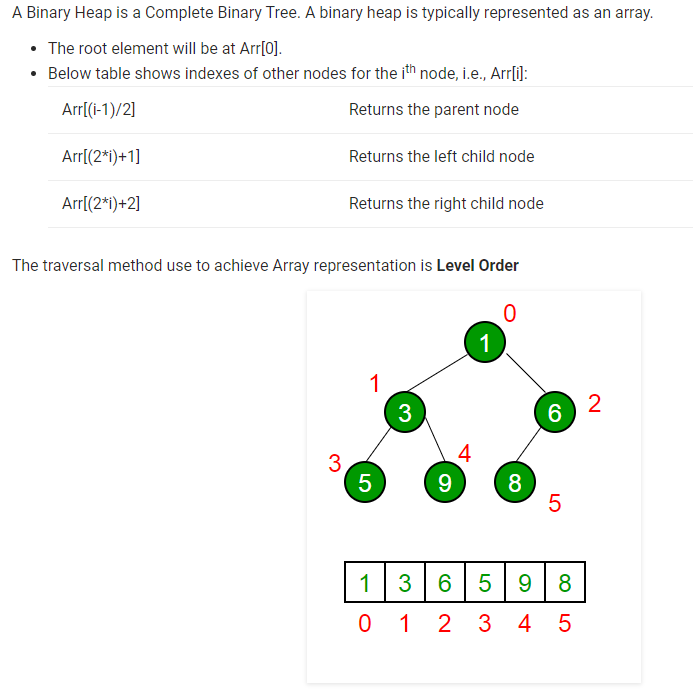

# Max heap

In [279]:
class MaxHeap:
    def __init__(self, arr=None):
        self.arr = arr
        if self.arr is not None:
            self.BuildMaxHeap()

    def BuildMaxHeap(self):
        # max heapify
        n = len(self.arr)
        # print(n)
        for i in range(int(n / 2), -1, -1):
            #print(i)
            self.MaxHeapify(i, n)
        return self.arr
            
   
    # makes heap - maintains heap order and shape property
    def MaxHeapify(self, i, n):
        left = self.Left(i)
        right = self.Right(i)
        # compare parent and left child - update largest index to left child if left child is greater
        if left <= n - 1 and self.arr[left] > self.arr[i]:
            largest = left
        # else parent is greater than child - update largest index to parent
        else:
            largest = i
        # now largest is either parent or left child - compare this largest index value with right child
        if right <= n - 1 and self.arr[right] > self.arr[largest]:
            largest = right
        # if largest index is not equal to parent itself - swap parent with one of child element
        if largest != i:
            # swap -- child at largest index with parent at index i
            self.Swap(i, largest)
            # if upper level parent is small value it need to be float down to further lower levels
            # recursively float it down
            self.MaxHeapify(largest, n)
            
    # insert element into heap
    # add new element to next open slot in array
    # float up the element with parent intil parent is atleast as large 
    def Insert(self, key):
        # add new element to last slot
        self.arr.append(key)
        # float up
        n = len(self.arr)
        i = n-1
        while(i>0 and self.arr[self.Parent(i)]<self.arr[i]):
            #print(i)
            self.Swap(i,self.Parent(i))
            i = self.Parent(i)
            #print('new',i)
            #self.PrintHeap()
        
    
    # extract max element from heap        
    def ExtractMax(self):
        if self.arr is None or len(self.arr)<1:
            print('No elements in heap')
            return
        n = len(self.arr)
        maxEle = self.arr[0]
        self.arr[0] = self.arr[n-1]
        # remove last element
        self.arr.pop()
        # decrease heap size by 1
        n -= 1     
        # reamkes heap
        self.MaxHeapify(0,n)
        return maxEle

    # increase key of element iif it is less than new key
    def IncreaseKey(self, i, key):
        if key < self.arr[i]:
            print('new key is smaller than current key')
            return
        self.arr[i] = key
        while(i>0 and self.arr[self.Parent(i)]<self.arr[i]):
            #print(i)
            self.Swap(i,self.Parent(i))
            i = self.Parent(i)
            #print('new',i)
            #self.PrintHeap()
            
    # heap sort
    def HeapSort(self, arr=None):
        #self.arr=arr
        if self.arr is not None:
            # build max heap
            #self.BuildMaxHeap() -- heap built in constructor
            n = len(self.arr)
            print('n',n)
            for i in range((n-1),0,-1):
                #print(i)
                #swap first and last
                self.Swap(0,i)                
                self.MaxHeapify(0,i)
                print(self.arr)
        return self.arr
                
                
    
    def Swap(self, i, largest):
        temp = self.arr[i]
        self.arr[i] = self.arr[largest]
        self.arr[largest] = temp

    # return left child index
    def Left(self, i):
        return 2 * i + 1

    # return right child index
    def Right(self, i):
        return 2 * i + 2
    
    # return parent index of given child index
    def Parent(self,i):
        return (i-1)//2

    def PrintHeap(self):
        print(self.arr)

In [280]:
a = [1,2,3,8,10,100,111]
heap = MaxHeap(a)
# convert list to heap
#h = heap.BuildMaxHeap()
#print('Heap: ',h)
heap.PrintHeap()

[111, 10, 100, 8, 2, 1, 3]


### Extract max element from heap

In [281]:
for i in range(len(heap.arr)):
    print('element removed: ',heap.ExtractMax())
    heap.PrintHeap()

element removed:  111
[100, 10, 3, 8, 2, 1]
element removed:  100
[10, 8, 3, 1, 2]
element removed:  10
[8, 2, 3, 1]
element removed:  8
[3, 2, 1]
element removed:  3
[2, 1]
element removed:  2
[1]
element removed:  1
[]


In [282]:
a = [1,2,3,8,10,100,111]
heap = MaxHeap(a)
# convert list to heap
#h = heap.BuildMaxHeap()
#print('Heap: ',h)
heap.PrintHeap()

[111, 10, 100, 8, 2, 1, 3]


### Insert into heap

In [283]:
heap.Insert(800)
heap.PrintHeap()

[800, 111, 100, 10, 2, 1, 3, 8]


### Increase key of an element in heap -  updates key value at given index

In [284]:
# give index and new key value
heap.IncreaseKey(6,1)
heap.PrintHeap()

new key is smaller than current key
[800, 111, 100, 10, 2, 1, 3, 8]


In [285]:
# updates key value at given index
heap.IncreaseKey(6,1000)
heap.PrintHeap()

[1000, 111, 800, 10, 2, 1, 100, 8]


In [288]:
a = [60,3,22,45,99,2,52]
heap = MaxHeap(a)
heap.HeapSort()

n 7
[60, 45, 52, 22, 3, 2, 99]
[52, 45, 2, 22, 3, 60, 99]
[45, 22, 2, 3, 52, 60, 99]
[22, 3, 2, 45, 52, 60, 99]
[3, 2, 22, 45, 52, 60, 99]
[2, 3, 22, 45, 52, 60, 99]


[2, 3, 22, 45, 52, 60, 99]